In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

In [10]:
# naive函数
x = sp.symbols('x')
f = x / sp.sqrt(1 + x*x)
f

x/sqrt(x**2 + 1)

In [76]:
F = sp.integrate(f)
x1,x2 = sp.symbols('x1,x2')
y = (F.subs(x,x1)-F.subs(x,x2))/(x1-x2)
y2 = (x1+x2)/(F.subs(x,x1)+F.subs(x,x2))
y2

(x1 + x2)/(sqrt(x1**2 + 1) + sqrt(x2**2 + 1))

In [77]:
y

(sqrt(x1**2 + 1) - sqrt(x2**2 + 1))/(x1 - x2)

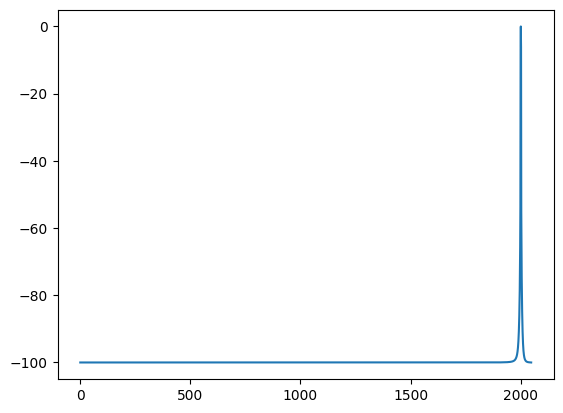

In [125]:
# naive测试
phase = np.linspace(0, 2*np.pi*2000.5, 4096)
sin_val = np.sin(phase)

hann_window = signal.windows.hann(4096)
scale = 2 / np.sum(hann_window)
sin_fft_val = np.fft.fft(scale * sin_val * hann_window)[:4096//2+1];
plt.plot(20 * np.log10(np.abs(sin_fft_val)+1e-5))
plt.show()

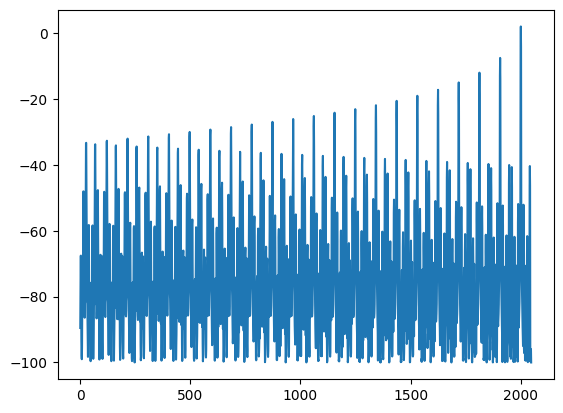

In [127]:
def NaiveWaveshape(x, db):
    gain = np.pow(10, db/20)
    x = x*gain
    return x/np.sqrt(1+x*x)

naive_sin_val = NaiveWaveshape(sin_val, 40)

hann_window = signal.windows.hann(4096)
scale = 2 / np.sum(hann_window)
naive_fft_val = np.fft.fft(scale * naive_sin_val * hann_window)[:4096//2+1];
plt.plot(20 * np.log10(np.abs(naive_fft_val)+1e-5))
plt.show()

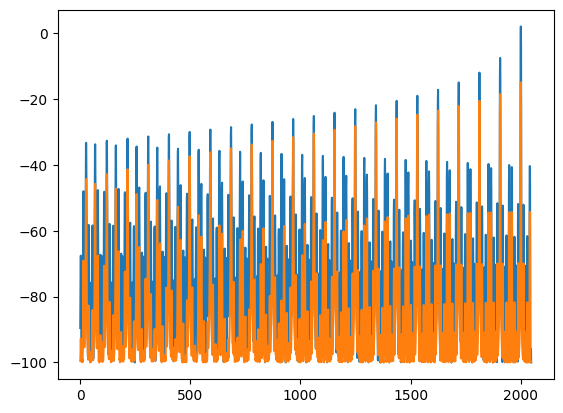

In [128]:
def ADAA2Waveshape(x, db):
    gain = np.pow(10, db/20)
    x = x*gain
    nums = len(x)
    xn1 = np.concat(([0],x[:nums-1]))
    xn = x
    return (xn+xn1)/(np.sqrt(1+xn*xn)+np.sqrt(1+xn1*xn1))

adaa2_sin_val = ADAA2Waveshape(sin_val, 40)

hann_window = signal.windows.hann(4096)
scale = 2 / np.sum(hann_window)
plt.plot(20 * np.log10(np.abs(naive_fft_val)+1e-5))
adaa2_fft_val = np.fft.fft(scale * adaa2_sin_val * hann_window)[:4096//2+1];
plt.plot(20 * np.log10(np.abs(adaa2_fft_val)+1e-5))
plt.show()

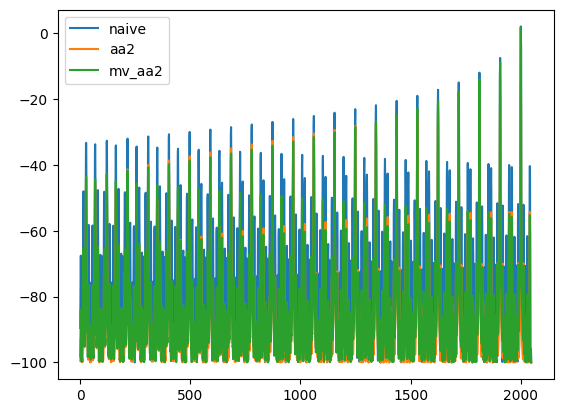

In [134]:
def ADAA2MVWaveshape(x, db):
    gain = np.pow(10, db/20)
    x = x*gain
    nums = len(x)
    xn2 = np.concat(([0,0],x[:nums-2]))
    xn1 = np.concat(([0],x[:nums-1]))
    xn = x
    f12 = np.sqrt(1+(xn+xn1)*(xn+xn1)/4)
    f1 = np.sqrt(1+xn1*xn1)
    f32 = np.sqrt(1+(xn1+xn2)*(xn1+xn2)/4)
    return 0.25*((xn+3*xn1)/(f12+f1)+(3*xn1+xn2)/(f1+f32))

adaa2_mv_sin_val = ADAA2MVWaveshape(sin_val, 100)

hann_window = signal.windows.hann(4096)
scale = 2 / np.sum(hann_window)
plt.plot(20 * np.log10(np.abs(naive_fft_val)+1e-5))
plt.plot(20 * np.log10(np.abs(adaa2_fft_val)+1e-5))
adaa2_mv_fft_val = np.fft.fft(scale * adaa2_mv_sin_val * hann_window)[:4096//2+1];
plt.plot(20 * np.log10(np.abs(adaa2_mv_fft_val)+1e-5))
plt.legend(['naive', 'aa2', 'mv_aa2'])
plt.show()